## Import Libraries

In [67]:
import pandas as pd
import numpy as np
import warnings
from sklearn import preprocessing
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (60,30)
plt.rcParams.update({'font.size': 35})

## Load Dataset

In [68]:
data=pd.DataFrame()
for v in range(0,1,1):
    data=pd.concat([data,(pd.read_csv(f"vibration ({v}).csv",header=None)[0])],ignore_index=True)
data.columns=["Vibration"]
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
names = data.columns
normalize = scaler.fit_transform(data)
norm = pd.DataFrame(normalize, columns=names)

## FFT

In [69]:
dt = 1/1600
t = np.arange(0,1,dt);
f = np.array(norm["Vibration"]);
n=len(t)
fhat=np.fft.fft(f,n)
PSD=fhat * np.conj(fhat)/n
freq =(1/(dt*n))*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype="int")
indices = PSD > 4
PSDclean = PSD*indices
fhat = indices*fhat
ffilt = np.fft.ifft(fhat)

## Graphs

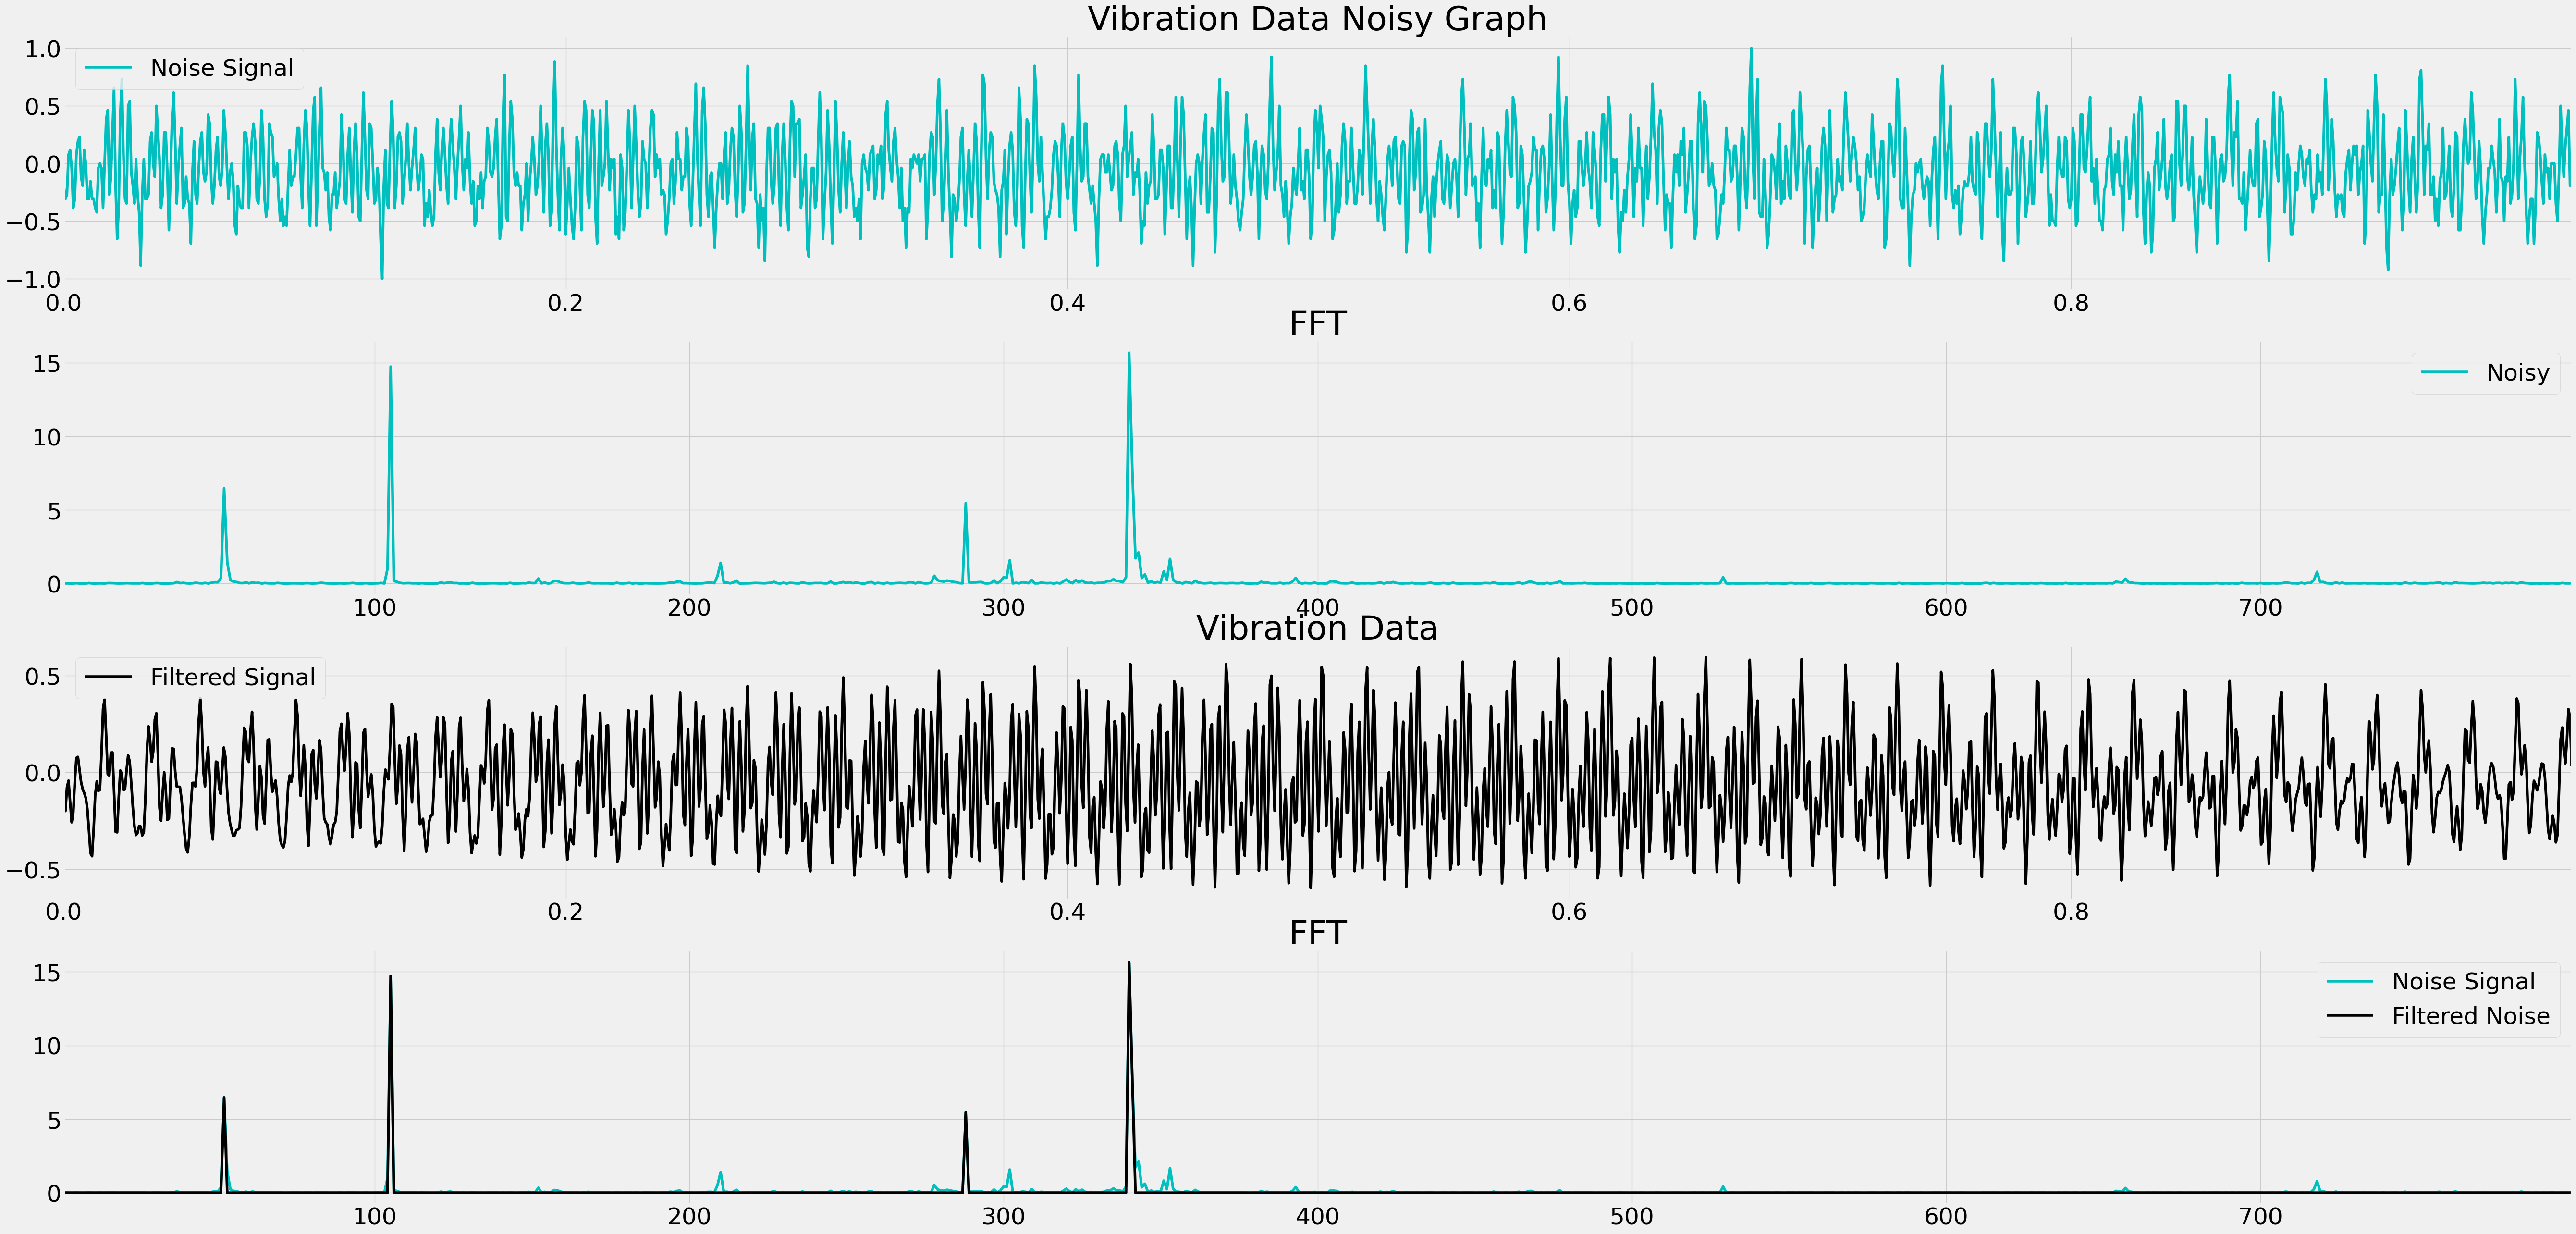

In [70]:
fig,axs=plt.subplots(4,1)
plt.sca(axs[0])
plt.plot(t,f,color="c",label="Noise Signal")
plt.xlim(t[0],t[-1])
plt.title("Vibration Data Noisy Graph");
plt.legend();
plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color="c",label="Noisy")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.title("FFT");
plt.legend()
plt.sca(axs[2])
plt.plot(t,ffilt,color="k",label="Filtered Signal")
plt.xlim(t[0],t[-1])
plt.title("Vibration Data");
plt.legend()
plt.sca(axs[3])
plt.plot(freq[L],PSD[L],color="c",label="Noise Signal")
plt.plot(freq[L],PSDclean[L],color="k",label="Filtered Noise")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.title("FFT");
plt.legend()
plt.show();